# 👽👾 `print(fiction)` 📚🛸

> #### A data science project by _Tobias Reaper_

#### 📓 Notebook 2: Data Wrangling and Exploration 🔬

---

### Notebook Outline

* Intro
* Imports and configuration
* Data wrangling
  * Null values
  * Feature management
  * Distributions and outliers
* Exploration and visualization
  * Basic statistics

---

## Intro

[quick intro to project]

[explanation of this notebook in context of project]

---

### 📥 Initial Imports and Configuration ⚙️

In [1]:
# === General Imports === #
import pandas as pd
import numpy as np
import os
import janitor

In [2]:
# === Visualization === #
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
# === Configure === #
%matplotlib inline
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

In [4]:
# Plotly imports
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.io as pio
pio.templates.default = "plotly"  # Set color theme
# list(pio.templates)  # Get list of plotly themes

In [5]:
# Jupyter + Plotly imports (if running in Colab or Visual Studio Code, comment out this cell)
import plotly.offline as pyo
pyo.init_notebook_mode()  # Set plotly to notebook mode / work offline

In [6]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

---

## 📈 Data wrangling ⛓

### Load and view basic data properties

Now that I have the dataset, I'm going to load it up, do some basic wrangling, and look at some basic summary statistics.

* Deal with null values
* Remove extraneous features
* Fix data types as needed (some feature engineering involved)

To start, I'm going to take care of null values. Then I'll remove some extraneous columns— features that won't be useful to the model.

In [7]:
# === Load the dataset === #
# This version is directly from the scraping, minimal processing
data_path = "assets/must_read_books-01.csv"

books = pd.read_csv(data_path)
print(books.shape)
books.head(3)

(21514, 21)


url  \
0  https://www.goodreads.com/book/show/323355.The...   
1  https://www.goodreads.com/book/show/28862.The_...   
2  https://www.goodreads.com/book/show/46654.The_...   

                                               title               author  \
0  The Book of Mormon: Another Testament of Jesus...            Anonymous   
1                                         The Prince  Niccolò Machiavelli   
2                             The Foundation Trilogy         Isaac Asimov   

   num_ratings  num_reviews  avg_rating  num_pages language  \
0      71355.0       5704.0        4.37      531.0  English   
1     229715.0       7261.0        3.81      140.0  English   
2      83933.0       1331.0        4.40      679.0  English   

          publish_date  original_publish_year  \
0  2013-10-22 00:00:00                 1830.0   
1  2003-06-01 00:00:00                 1513.0   
2  1974-01-01 00:00:00                 1953.0   

                                              genres  \
0  ['Lds', 'Church', 'Christianity', 'Religion', ...   
1  ['European Literature', 'Italian Literature', ...   
2         ['Science Fiction', 'Classics', 'Fiction']   

                                          characters  \
0                                                NaN   
1  ['Theseus (mythology)', 'Alexander the Great',...   
2  ['Hari Seldon', 'Salvor Hardin', 'Hober Mallow...   

                                series places asin  0_rating_count  \
0                                  NaN    NaN  NaN             NaN   
1                                  NaN    NaN  NaN             NaN   
2  Foundation (Publication Order) #1-3    NaN  NaN             NaN   

   1_rating_count  2_rating_count  3_rating_count  4_rating_count  \
0          7520.0          2697.0          2521.0          1963.0   
1          5254.0         16827.0         61182.0         80221.0   
2           477.0          1521.0          9016.0         25447.0   

   5_rating_count  
0         56654.0  
1         66231.0  
2         47472.0

In [8]:
# === Basic info === #
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21514 entries, 0 to 21513
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    21514 non-null  object 
 1   title                  21513 non-null  object 
 2   author                 21513 non-null  object 
 3   num_ratings            21513 non-null  float64
 4   num_reviews            21513 non-null  float64
 5   avg_rating             21513 non-null  float64
 6   num_pages              20339 non-null  float64
 7   language               19366 non-null  object 
 8   publish_date           21078 non-null  object 
 9   original_publish_year  12839 non-null  float64
 10  genres                 18573 non-null  object 
 11  characters             5823 non-null   object 
 12  series                 7048 non-null   object 
 13  places                 5238 non-null   object 
 14  asin                   3953 non-null   object 
 15  0_

#### Feature management

Before digging deep into the data, there was some initial processing and pruning to be done to the features to make them more manageable later on.
Right off the bat I can remove some features that likely won't be useful in the model:

* url
* asin
* 0_rating_count
* characters
* places

'url' and 'asin' are obviously not going to be useful, just extra noise. As can be seen in the info table above, '0_rating_count' was completely null because GoodReads doesn't allow books to get zero stars.
I based my decision to remove 'characters' and 'places' on my domain knowledge and on the quality of their data. In my experience, nonfiction books are much less likely to be set in a particular location or have characters. On the one hand, this could be valuable information for the model to know: if the book has a list of characters, it is more likely to be fiction. On the other hand, that information could be too useful—i.e. it could leak information about the target.

Both have a high proportion of null values—over 50%, as can be seen in the table above—and I cannot be sure whether the null values represent the fact that users simply haven't taken the time to add that data to those books, or if those books really do not have any significant characters or places.

In [9]:
# === Drop extraneous features === #
drop_cols = [
    "url",
    "asin",
    "0_rating_count",
    "characters",
    "places",
]

books = books.drop(columns=drop_cols)

##### Data types

I did some initial feature engineering early on to make the features more manageable for me and usable for the model. More feature engineering will take place later on.
First, the 'publish_date' feature needed to be split up into its component parts (year, month, day), because Scikit-learn models can't directly use the datetime format. By splitting them up into integers,  their meaning can be preserved and the model can process them.

Second, I had to deal with nested data. Most notably, the 'genres' column was organized as an array of genres for each book. Because Pandas doesn't parse this kind of data by default, the column imported as the object (text) datatype. The best way I found to deal with it, without delving into natural language processing, was to break out each genre into its own column, one-hot encoding style.

This step was very important, as I used the genres to engineer the 'fiction' target.

> NOTE: these steps have to happen after the 'genre' null values are removed.

In [10]:
# === Break out publish_date into components === #

def book_pub_date(df: pd.DataFrame):
    """Deconcatenates book publish_date to three separate features
    for year, month, and day. Drops the original publish_date feature.
    """
    # Convert the "publish_date" column to datetime
    df["publish_date"] = pd.to_datetime(df["publish_date"], errors="coerce", infer_datetime_format=True)

    # Break out "publish_date" into dt components
    df["publish_year"] = df["publish_date"].dt.year
    df["publish_month"] = df["publish_date"].dt.month
    df["publish_day"] = df["publish_date"].dt.day
    
    df = df.drop(columns=["publish_date"])  # Drop the OG publish_date
    
    return df


books = book_pub_date(books)
books.head(2)

title               author  \
0  The Book of Mormon: Another Testament of Jesus...            Anonymous   
1                                         The Prince  Niccolò Machiavelli   

   num_ratings  num_reviews  avg_rating  num_pages language  \
0      71355.0       5704.0        4.37      531.0  English   
1     229715.0       7261.0        3.81      140.0  English   

   original_publish_year                                             genres  \
0                 1830.0  ['Lds', 'Church', 'Christianity', 'Religion', ...   
1                 1513.0  ['European Literature', 'Italian Literature', ...   

  series  1_rating_count  2_rating_count  3_rating_count  4_rating_count  \
0    NaN          7520.0          2697.0          2521.0          1963.0   
1    NaN          5254.0         16827.0         61182.0         80221.0   

   5_rating_count  publish_year  publish_month  publish_day  
0         56654.0        2013.0           10.0         22.0  
1         66231.0        2003.0            6.0          1.0

### Null values

A feature with a large proportion of null values is far less likely to be useful, as imputing (filling in) the missing data can add noise that would adversely affect the model. Therefore, a feature such as that will be considered extraneous and removed from the dataset. However, given a small enough proportion of null values, imputing or otherwise filling in the missing data is more able to preserve the patterns that exist in those features.

There is one specific feature for which I want to drop all rows that are null: 'genres'. Because I am going to be using this to engineer my target, I don't want to risk biasing the model by imputing the missing values.

The above table doesn't do a great job describing the null value situation. Below is a visualization (thanks to missingno) showing the distribution and proportion of null values per feature.

In [11]:
# === Drop rows with null "genres" === #
books = books.dropna(subset=["genres"])
print(books.shape)
books.head(2)

(18573, 18)


title               author  \
0  The Book of Mormon: Another Testament of Jesus...            Anonymous   
1                                         The Prince  Niccolò Machiavelli   

   num_ratings  num_reviews  avg_rating  num_pages language  \
0      71355.0       5704.0        4.37      531.0  English   
1     229715.0       7261.0        3.81      140.0  English   

   original_publish_year                                             genres  \
0                 1830.0  ['Lds', 'Church', 'Christianity', 'Religion', ...   
1                 1513.0  ['European Literature', 'Italian Literature', ...   

  series  1_rating_count  2_rating_count  3_rating_count  4_rating_count  \
0    NaN          7520.0          2697.0          2521.0          1963.0   
1    NaN          5254.0         16827.0         61182.0         80221.0   

   5_rating_count  publish_year  publish_month  publish_day  
0         56654.0        2013.0           10.0         22.0  
1         66231.0        2003.0            6.0          1.0

In [12]:
books.isnull().sum()

title                        0
author                       0
num_ratings                  0
num_reviews                  0
avg_rating                   0
num_pages                  676
language                  1359
original_publish_year     6364
genres                       0
series                   11788
1_rating_count              83
2_rating_count              83
3_rating_count              83
4_rating_count              83
5_rating_count              83
publish_year               284
publish_month              284
publish_day                284
dtype: int64

Text(0.5, 1.0, 'Null values by feature')

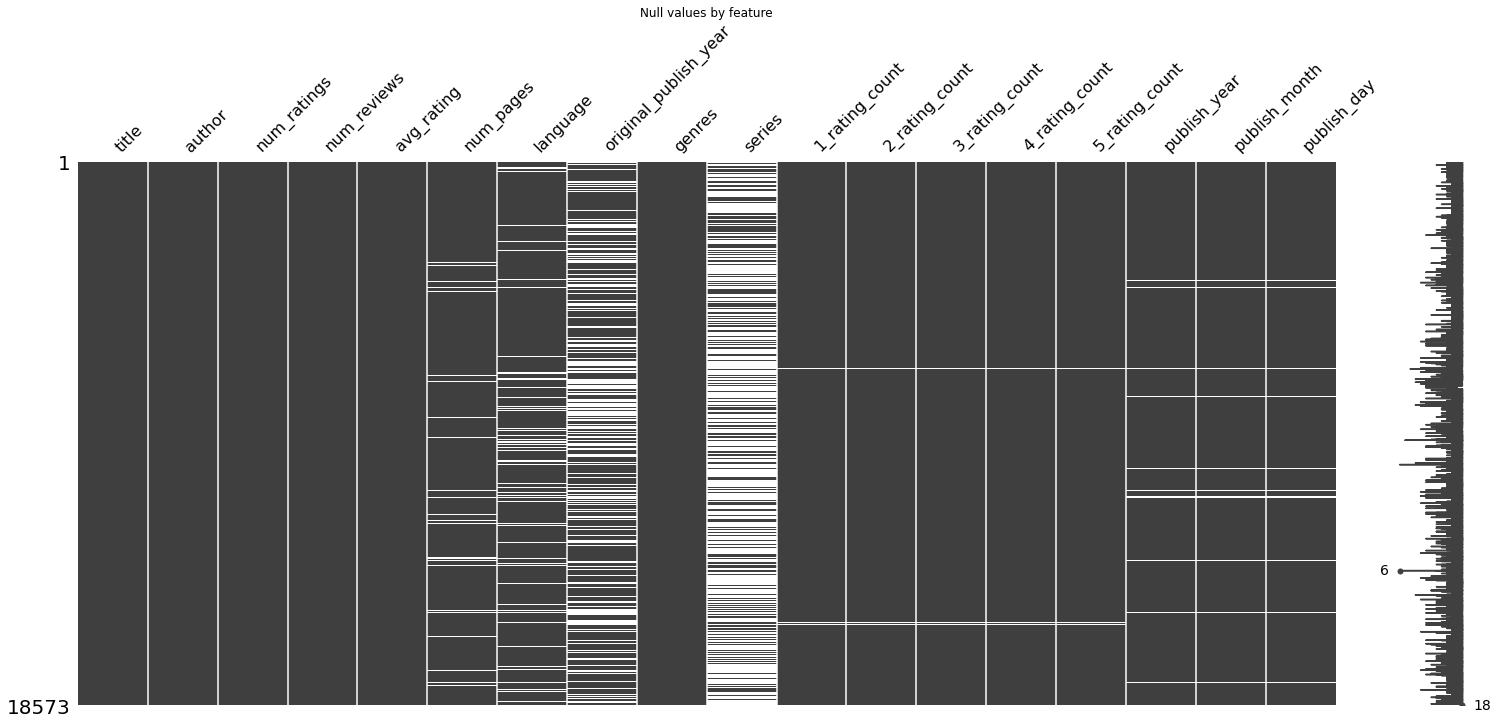

In [13]:
# === Use missingno to visualize nulls === #
# import missingno as msno
msno.matrix(books)
plt.title("Null values by feature")
# plt.tight_layout()
# plt.savefig("null_values_by_feature.png", dpi=80)

I used Scikit-learn's IterativeImputer to impute the missing values for many of the features with null values. The IterativeImputer class provides a whole suite of options to intelligently optimize how the values are imputed. But most importantly, it models each feature as a function of the other features, using that model to "predict" what the missing value would have been if it wasn't null.

There are a couple of features that had to be dealt with differently, 'original_publish_year' and 'series', as their null values actually held information.

For 'original_publish_year', I'm going to assume that a null value indicates that the book has not been previously published. And similarly for 'series', I'm assuming null indicates a standalone book. I transformed both of these features into binary: 0 indicating the value was null, 1 indicating it was not.

In [14]:
# === Encode the 'genres' feature === #

def encode_book_genres(df: pd.DataFrame):
    """Deconcatenates top 30 book genres into
    separate features, OneHotEncoding style.
    """
    from ast import literal_eval
    
    # === Convert 'genres' to python list === #
    df["genres"] = df["genres"].apply(literal_eval)
    
    # Create a set of all distinct genres listed in dataset
    all_genres = {genre for row_genres in df["genres"] for genre in row_genres}

    # Create a new feature for every genre
    for genre in all_genres:
        has_genre = lambda g: genre in g
        df[genre] = df.genres.apply(has_genre)

    # Create list of top 30 most common genres
    # NOTE: I ended up only using 'fiction', the top result
    most_common_genres = df[list(all_genres)].sum().sort_values(ascending=False).head(1)
    most_common_genres = most_common_genres.index.tolist()
    
    # Drop all but the top 30 genres from the dataframe
    unwanted_genres = list(all_genres - set(most_common_genres))
    df = df.drop(columns=unwanted_genres)
    
    # Drop the original "genres" feature
    df = df.drop(columns=["genres"])
    
    # Convert from Boolean to binary
    df = df.replace(to_replace={True: 1, False:0})
    
    # Format column names with pyjanitor
    df = (df.clean_names())
    
    return df


books = encode_book_genres(books)
books.head(2)

title               author  \
0  The Book of Mormon: Another Testament of Jesus...            Anonymous   
1                                         The Prince  Niccolò Machiavelli   

   num_ratings  num_reviews  avg_rating  num_pages language  \
0      71355.0       5704.0        4.37      531.0  English   
1     229715.0       7261.0        3.81      140.0  English   

   original_publish_year series  1_rating_count  2_rating_count  \
0                 1830.0    NaN          7520.0          2697.0   
1                 1513.0    NaN          5254.0         16827.0   

   3_rating_count  4_rating_count  5_rating_count  publish_year  \
0          2521.0          1963.0         56654.0        2013.0   
1         61182.0         80221.0         66231.0        2003.0   

   publish_month  publish_day  fiction  
0           10.0         22.0        0  
1            6.0          1.0        0

In [15]:
# === Convert series to binary / boolean === #
books["series"] = books["series"].notnull().replace(to_replace={True: 1, False:0})
books["series"].value_counts()

0    11788
1     6785
Name: series, dtype: int64

In [16]:
# === Convert original_publish_year to binary / boolean === #
books["republish"] = books["original_publish_year"].notnull().replace(to_replace={True: 1, False:0})
books = books.drop(columns=["original_publish_year"])
books["republish"].value_counts()

1    12209
0     6364
Name: republish, dtype: int64

In [17]:
books.dtypes

title              object
author             object
num_ratings       float64
num_reviews       float64
avg_rating        float64
num_pages         float64
language           object
series              int64
1_rating_count    float64
2_rating_count    float64
3_rating_count    float64
4_rating_count    float64
5_rating_count    float64
publish_year      float64
publish_month     float64
publish_day       float64
fiction             int64
republish           int64
dtype: object

---

## Exploration and visualization

In [18]:
# === Basic descriptive statistics of numeric data === #
books.describe().T

count          mean            std     min      25%  \
num_ratings     18573.0  46958.564906  212398.096869     0.0   387.00   
num_reviews     18573.0   2289.266247    7681.862032     0.0    41.00   
avg_rating      18573.0      4.029929       0.303335     0.0     3.84   
num_pages       17897.0    340.212661     249.007716     0.0   221.00   
series          18573.0      0.365315       0.481531     0.0     0.00   
1_rating_count  18490.0   1049.250135    6484.347528     0.0     7.00   
2_rating_count  18490.0   2270.299459   10177.791045     0.0    19.00   
3_rating_count  18490.0   8248.047864   32751.345253     0.0    72.00   
4_rating_count  18490.0  15479.218983   65574.246998     0.0   132.00   
5_rating_count  18490.0  20122.527582  105326.268552     0.0   145.00   
publish_year    18289.0   2005.629231      10.709413  1816.0  2001.00   
publish_month   18289.0      6.689650       3.411024     1.0     4.00   
publish_day     18289.0     13.731423      10.042377     1.0     3.00   
fiction         18573.0      0.524686       0.499404     0.0     0.00   
republish       18573.0      0.657352       0.474608     0.0     0.00   

                    50%       75%        max  
num_ratings     4135.00  23108.00  6144613.0  
num_reviews      271.00   1380.00   163981.0  
avg_rating         4.04      4.22        5.0  
num_pages        307.00    402.00     8124.0  
series             0.00      1.00        1.0  
1_rating_count    70.00    383.00   509660.0  
2_rating_count   202.00   1080.00   497885.0  
3_rating_count   829.00   4465.75   916924.0  
4_rating_count  1443.00   8043.50  1760651.0  
5_rating_count  1479.50   8700.25  3954496.0  
publish_year    2008.00   2013.00     2019.0  
publish_month      7.00     10.00       12.0  
publish_day       14.00     23.00       31.0  
fiction            1.00      1.00        1.0  
republish          1.00      1.00        1.0

In [19]:
# === Categorical features === #
books.describe(exclude="number").T.sort_values(by="unique")

count unique             top   freq
language  17214     55         English  15909
author    18573  10019    Stephen King     79
title     18573  17816  Selected Poems      6

### Duplicates? ^^^(title)

> Or...republished?

In [20]:
books[books["title"] == "When Breath Becomes Air"]

title          author  num_ratings  num_reviews  \
39     When Breath Becomes Air  Paul Kalanithi     332950.0      28262.0   
4782   When Breath Becomes Air  Paul Kalanithi     333005.0      28275.0   
10877  When Breath Becomes Air  Paul Kalanithi     332942.0      28259.0   
12947  When Breath Becomes Air  Paul Kalanithi     333024.0      28277.0   
13426  When Breath Becomes Air  Paul Kalanithi     333025.0      28277.0   
19976  When Breath Becomes Air  Paul Kalanithi     333042.0      28279.0   

       avg_rating  num_pages language  series  1_rating_count  2_rating_count  \
39           4.35      208.0  English       0          4685.0          8103.0   
4782         4.35      229.0  English       0          4685.0          8103.0   
10877        4.35      229.0  English       0          4685.0          8103.0   
12947        4.35      209.0      NaN       0          4686.0          8103.0   
13426        4.35      228.0  English       0          4686.0          8103.0   
19976        4.35        5.0  English       0          4686.0          8104.0   

       3_rating_count  4_rating_count  5_rating_count  publish_year  \
39            35451.0        101807.0        182904.0        2016.0   
4782          35454.0        101823.0        182940.0        2016.0   
10877         35451.0        101804.0        182899.0        2017.0   
12947         35455.0        101826.0        182954.0        2016.0   
13426         35455.0        101826.0        182955.0        2016.0   
19976         35457.0        101830.0        182965.0        2016.0   

       publish_month  publish_day  fiction  republish  
39               1.0         19.0        0          1  
4782             1.0         12.0        0          0  
10877            1.0         23.0        0          1  
12947            2.0         17.0        0          1  
13426            1.0         12.0        0          0  
19976            1.0         12.0        0          0

Looks like there are some duplicates. I'm going to use `title`, `author`, and `publish_year` as the subset this time.

In [21]:
# === Drop more duplicates === #
books = books.drop_duplicates(subset=["title", "author", "publish_year"])

In [22]:
# === Look at the result === #
books.shape

(18383, 18)

It looks like there were around 200 duplicates that slipped through the cracks. Not this time!

### Distributions and outliers

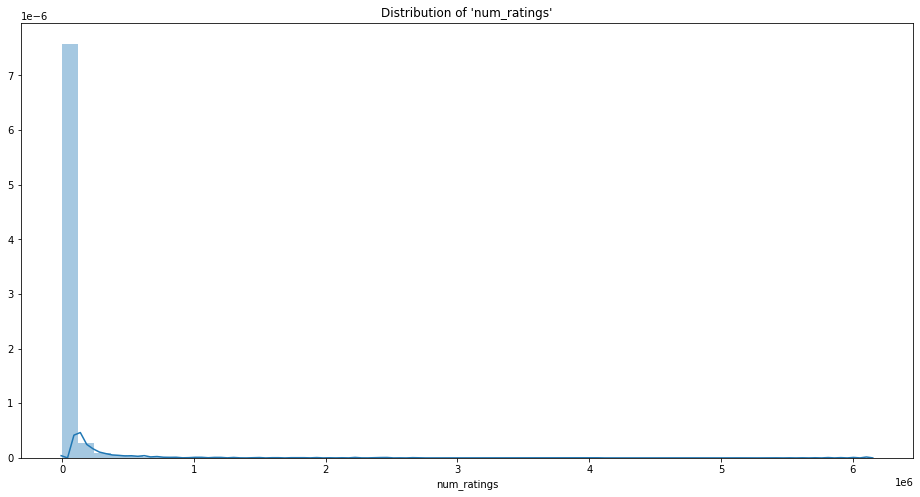

In [25]:
# === Distribution === #
plt.figure(figsize=(16, 8))
sns.distplot(books["num_ratings"])
plt.title("Distribution of 'num_ratings'");
# plt.savefig("num_ratings_distplot.png", dpi=160)

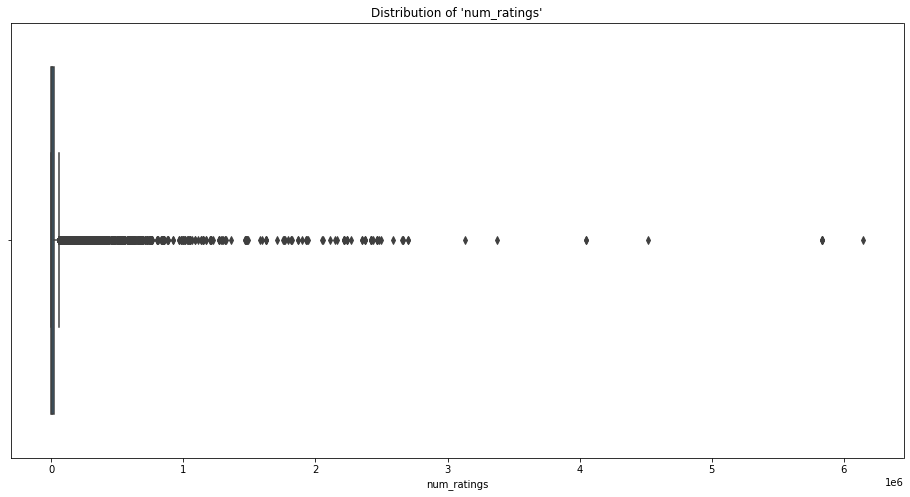

In [24]:
# === Boxplot to view outliers === #
plt.figure(figsize=(16, 8))
sns.boxplot(x=books["num_ratings"])
plt.title("Distribution of 'num_ratings'");
# plt.savefig("num_ratings_boxplot.png", dpi=160)

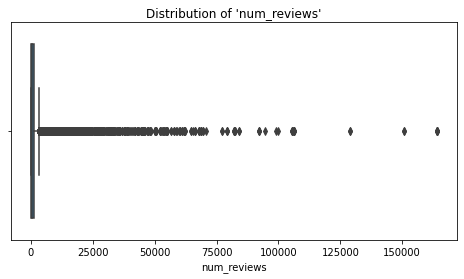

In [54]:
# To find outliers in numerical features, utilize boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=books["num_reviews"])
plt.title("Distribution of 'num_reviews'");
plt.savefig("num_reviews_boxplot.png", dpi=160)

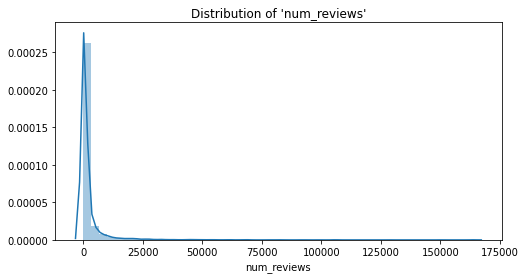

In [55]:
plt.figure(figsize=(8, 4))
sns.distplot(books["num_reviews"])
plt.title("Distribution of 'num_reviews'");
plt.savefig("num_reviews_distplot.png", dpi=160)

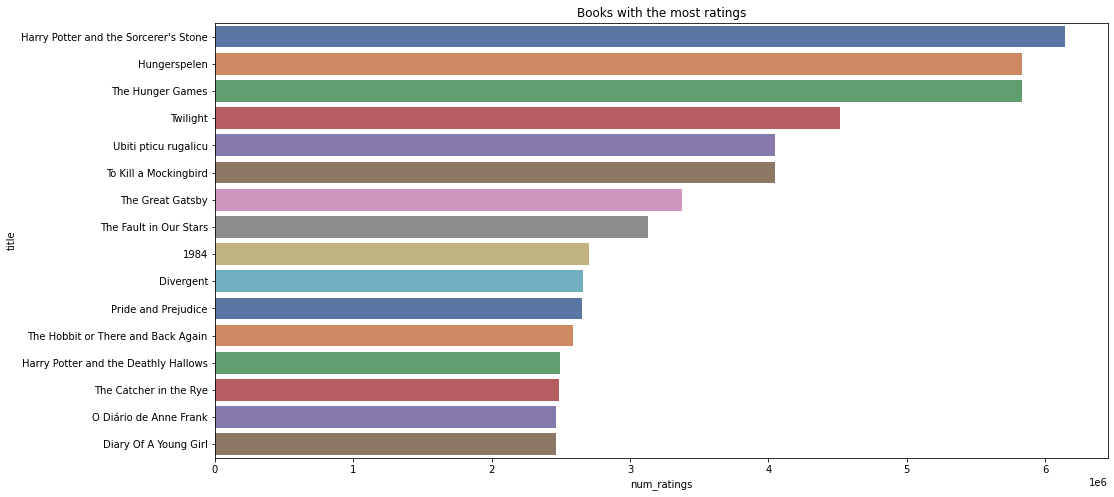

In [26]:
# === Books with the most ratings === #
hiratings = books.nlargest(20, ["num_ratings"]).set_index("title")["num_ratings"]
plt.figure(figsize=(16, 8))
sns.barplot(hiratings, hiratings.index, palette="deep")
plt.title("Books with the most ratings");
# plt.tight_layout()
# plt.savefig("books_most_ratings.png", dpi=160)

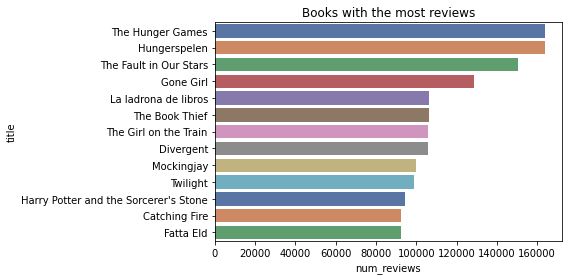

In [59]:
# Books with the most reviews
hireviews = books.nlargest(24, ["num_reviews"]).set_index("title")["num_reviews"]
plt.figure(figsize=(8, 4))
sns.barplot(hireviews, hireviews.index, palette="deep")
plt.title("Books with the most reviews")
plt.tight_layout();
plt.savefig("books_most_reviews.png", dpi=160)

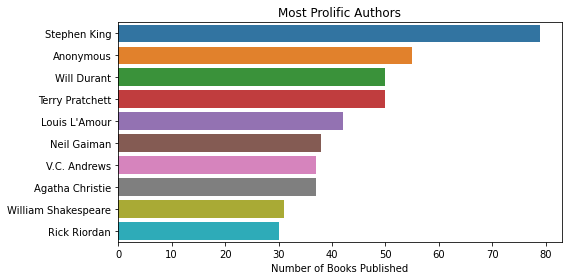

In [61]:
# Most prolific authors
prolifics = books["author"].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(prolifics, prolifics.index)
plt.title("Most Prolific Authors")
plt.tight_layout()
plt.xlabel("Number of Books Published");
plt.savefig("authors_most_books.png", dpi=160)

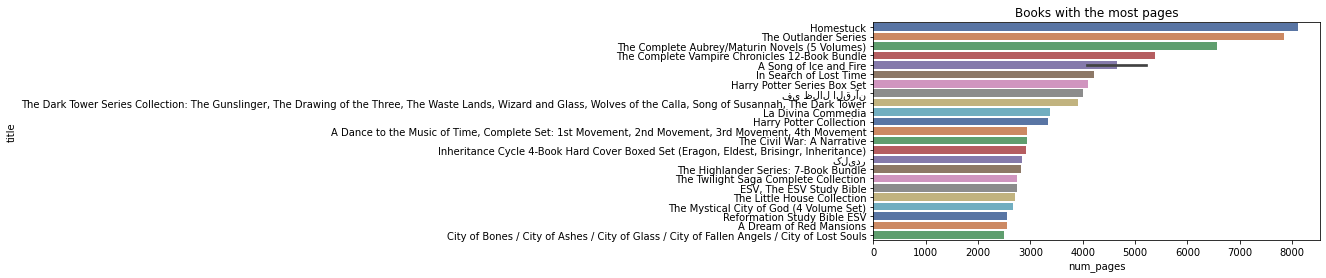

In [62]:
# === Books with the most pages === #
hipages = books.nlargest(24, ["num_pages"]).set_index("title")["num_pages"]
plt.figure(figsize=(8, 4))
sns.barplot(hipages, hipages.index, palette="deep")
plt.title("Books with the most pages");
# plt.savefig("books_most_pages.png", dpi=160)

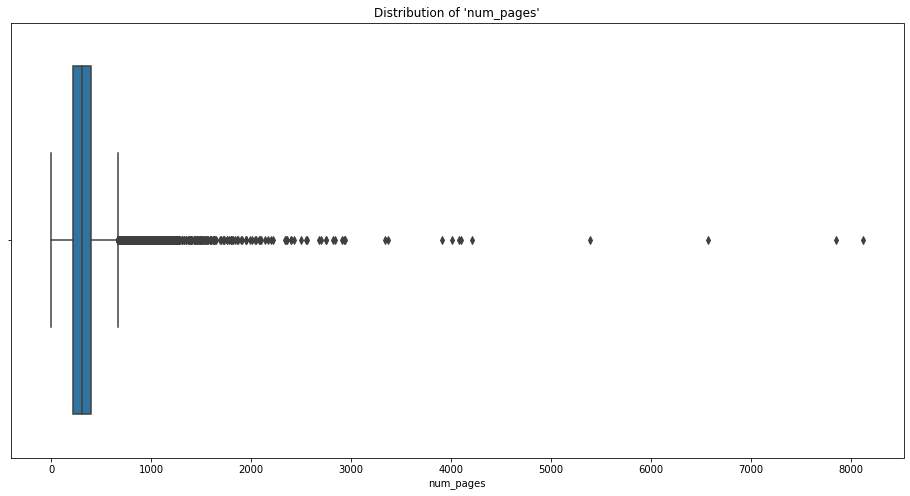

In [27]:
# === Boxplot to view outliers === #
plt.figure(figsize=(16, 8))
sns.boxplot(x=books["num_pages"])
plt.title("Distribution of 'num_pages'");
# plt.savefig("num_pages_boxplot.png", dpi=160)

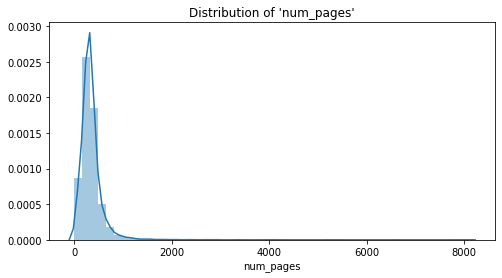

In [50]:
# === Distribution plot === #
plt.figure(figsize=(8, 4))
sns.distplot(books["num_pages"])
plt.title("Distribution of 'num_pages'");
plt.savefig("num_pages_distplot.png", dpi=160)

### Removing outliers

In [23]:
# === Removing pages outliers === #
# This could be one of the sliders on the dashboard
cutoff = 2000
books_over_pages_cutoff = books[books["num_pages"] > cutoff]
print(books_over_pages_cutoff.shape)
books_over_pages_cutoff.head(2)

(39, 18)


title           author  \
114  The Complete Anne of Green Gables Boxed Set  L.M. Montgomery   
274                       In Search of Lost Time    Marcel Proust   

     num_ratings  num_reviews  avg_rating  num_pages language  series  \
114      99371.0       1491.0        4.43     2088.0  English       1   
274       9249.0        515.0        4.34     4211.0  English       1   

     1_rating_count  2_rating_count  3_rating_count  4_rating_count  \
114          1611.0          2123.0          9689.0         24650.0   
274           249.0           365.0           965.0          2045.0   

     5_rating_count  publish_year  publish_month  publish_day  fiction  \
114         61298.0        1998.0           10.0          6.0        1   
274          5625.0        2003.0            6.0          3.0        1   

     republish  
114          1  
274          1

In [24]:
# === Drop rows with num_pages > 2000 === #
books2 = books.drop(books_over_pages_cutoff.index, axis=0)
print(books2.shape)
books2.head(2)

(18344, 18)


title               author  \
0  The Book of Mormon: Another Testament of Jesus...            Anonymous   
1                                         The Prince  Niccolò Machiavelli   

   num_ratings  num_reviews  avg_rating  num_pages language  series  \
0      71355.0       5704.0        4.37      531.0  English       0   
1     229715.0       7261.0        3.81      140.0  English       0   

   1_rating_count  2_rating_count  3_rating_count  4_rating_count  \
0          7520.0          2697.0          2521.0          1963.0   
1          5254.0         16827.0         61182.0         80221.0   

   5_rating_count  publish_year  publish_month  publish_day  fiction  \
0         56654.0        2013.0           10.0         22.0        0   
1         66231.0        2003.0            6.0          1.0        0   

   republish  
0          1  
1          1

In [25]:
# === Confirm it worked as expected === #
books2["num_pages"].describe()

count    17678.000000
mean       333.513576
std        196.836062
min          0.000000
25%        220.000000
50%        306.000000
75%        400.000000
max       1985.000000
Name: num_pages, dtype: float64

In [27]:
# === Save to CSV === #
books2.to_csv("assets/must_read_books-02.csv", na_rep="?", index=False)

### Feature relationships

One final line of inquiry I wanted to explore before diving into the model was to look at relationships between features and between the target and individual features. The obvious first step was to create a matrix of scatterplots between what I believed to be the most important features and the target. As the target is binary, I thought it best to represent it as a third dimension in each of the scatterplots: color.

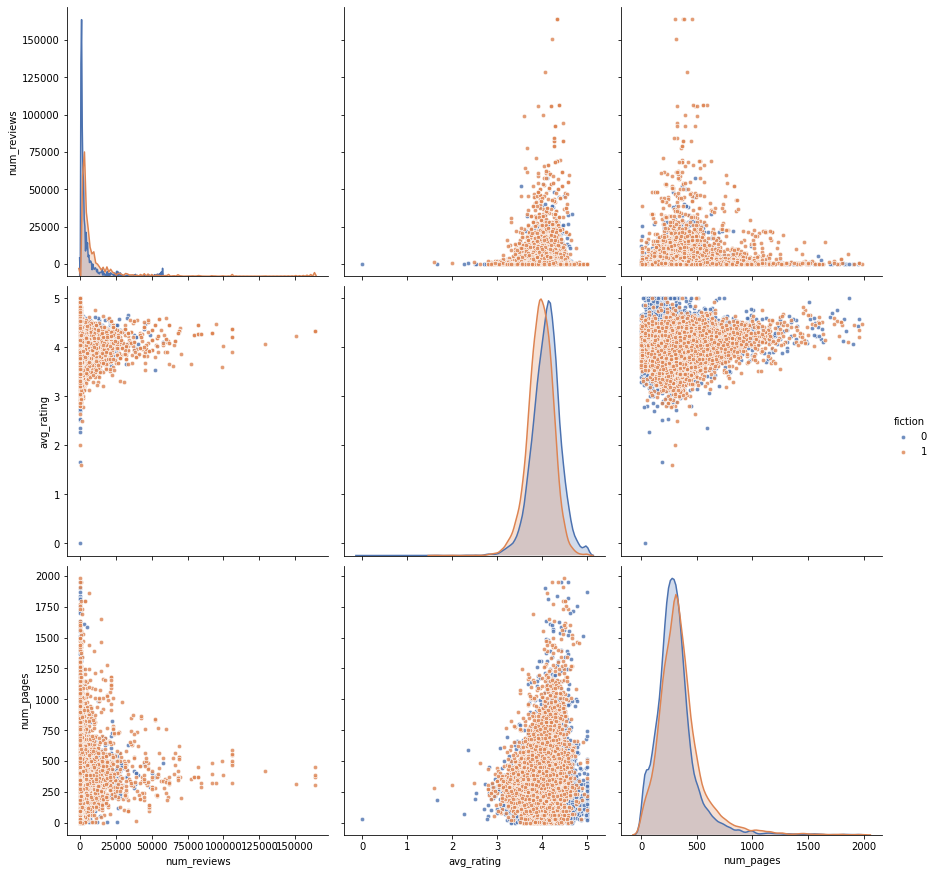

In [78]:
# === Scatter matrix / pairplot === #
sns.pairplot(
    books2,
    hue="fiction",
    vars=["num_reviews", "avg_rating", "num_pages"],
    palette="deep",
    plot_kws=dict(alpha=0.8, s=20),
    height=4,
);

Although it's difficult to see much in the way of detail, this matrix is great for getting an overall idea of what's going on between the features in question.
One characteristic that sticks out to me is that the majority of outliers in 'num_ratings' are fiction books. This helps confirm my earlier hypothesis that these outliers will be valuable to the model.

Also, I can see that 'avg_rating' seems to be different between fiction and nonfiction books. The comparison of distributions (middle-middle) and the scatter plots comparing 'avg_rating' to 'num_pages' (middle-bottom and middle-right) seem to indicate that nonfiction books are rated slightly higher than fiction.

Seeing this difference in densities when grouped by the target made me want to explore other features in this manner. An interesting one I found was 'publish_year'. As can be seen in plot below, it seems that the "golden years" of fiction were in the mid-2000s (at least according to this reading list), whereas the mid-2010s had more good nonfiction.

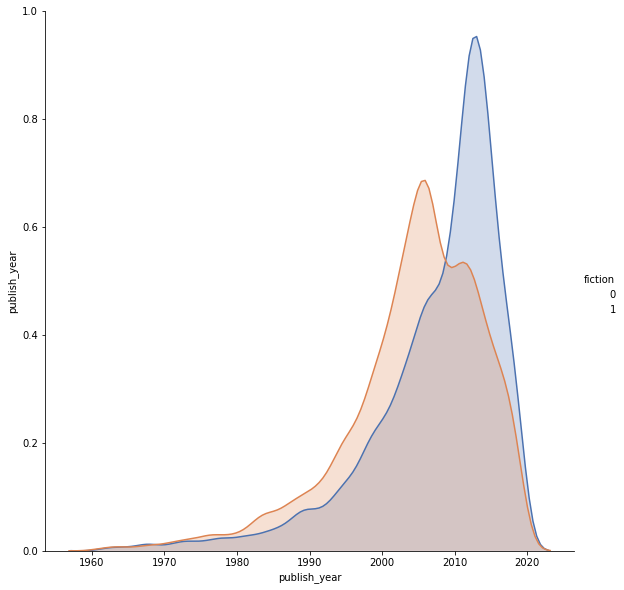

In [106]:
# === Scatter matrix / pairplot === #
sns.pairplot(
    books2[books2["publish_year"] > 1960],
    hue="fiction",
    vars=["publish_year"],
    palette="deep",
    plot_kws=dict(alpha=0.8, s=20),
    height=8,
);

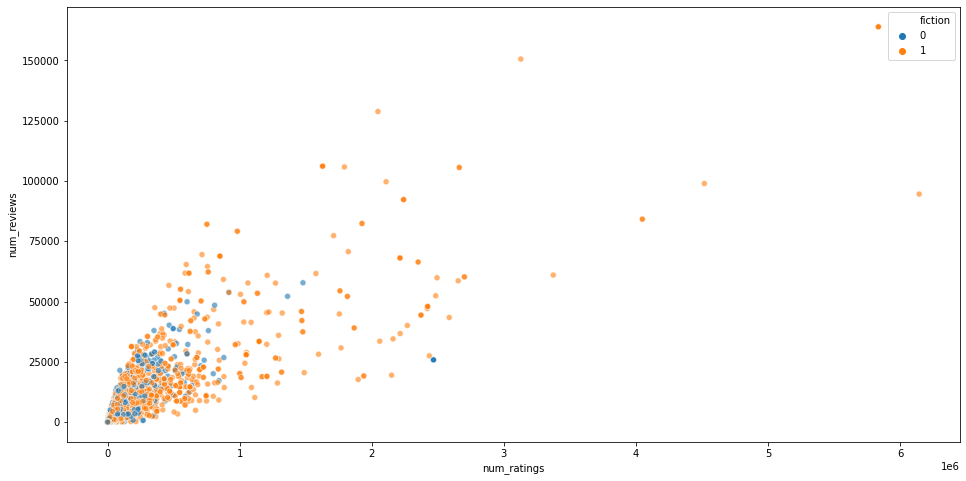

In [101]:
# === Individual scatters === #
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=books2,
    x="num_ratings",
    y="num_reviews",
    hue="fiction",
    alpha=0.6,
)
plt.title("");

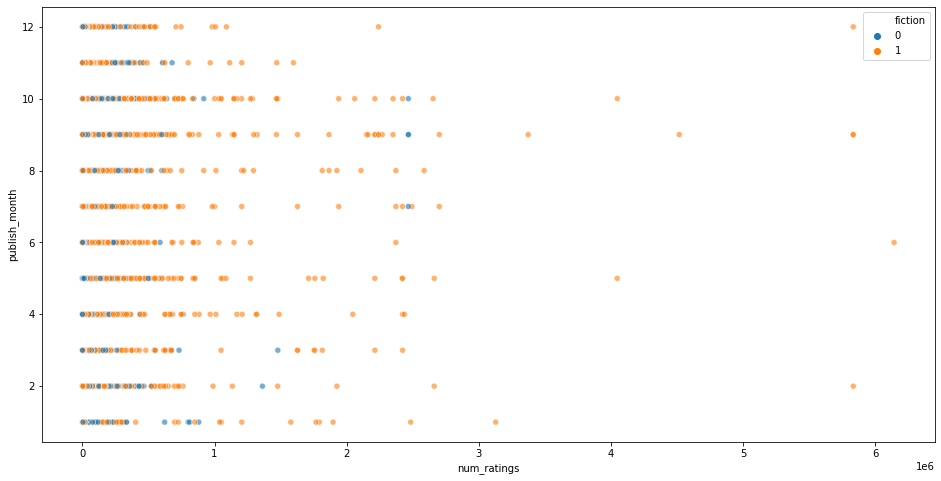

In [108]:
# === Individual scatters === #
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=books2,
    x="num_ratings",
    y="publish_month",
    hue="fiction",
    alpha=0.6,
);

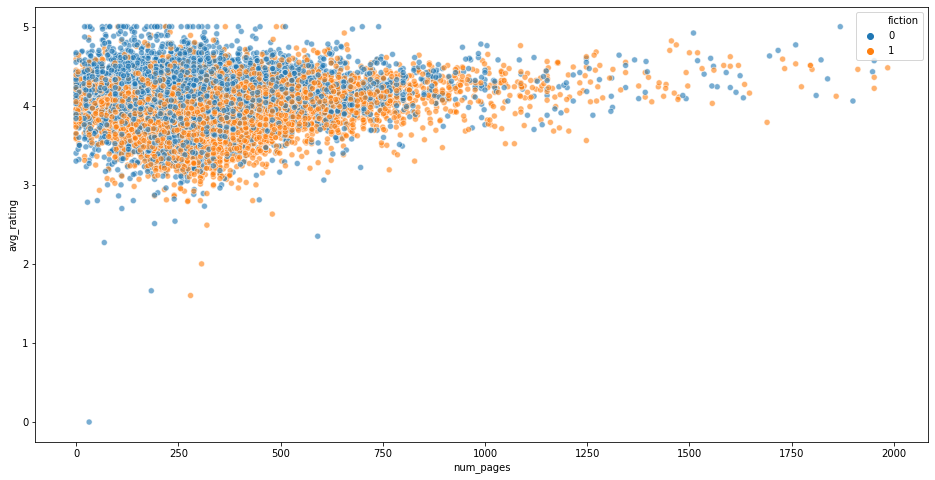

In [48]:
# === Individual scatters === #
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=books2,
    x="num_pages",
    y="avg_rating",
    hue="fiction",
    alpha=0.6,
)

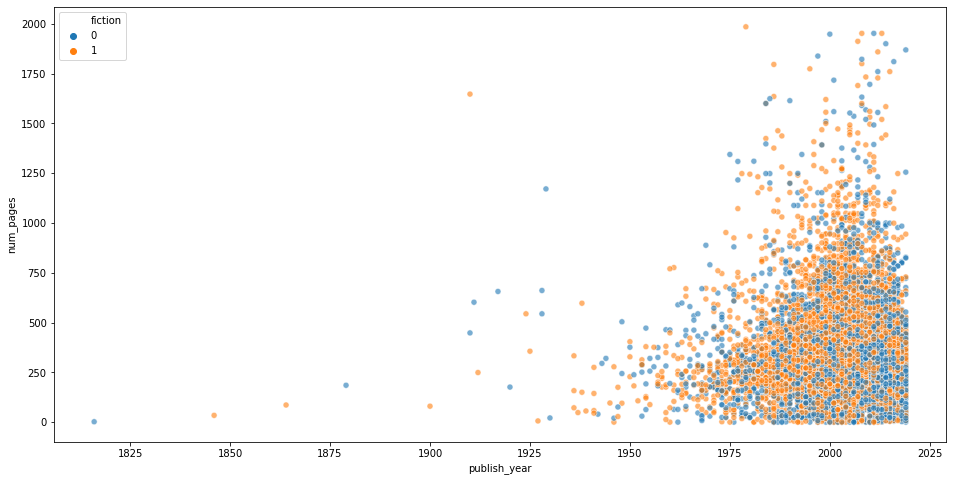

In [103]:
# === Individual scatters === #
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=books2,
    x="publish_year",
    y="num_pages",
    hue="fiction",
    alpha=0.6,
);

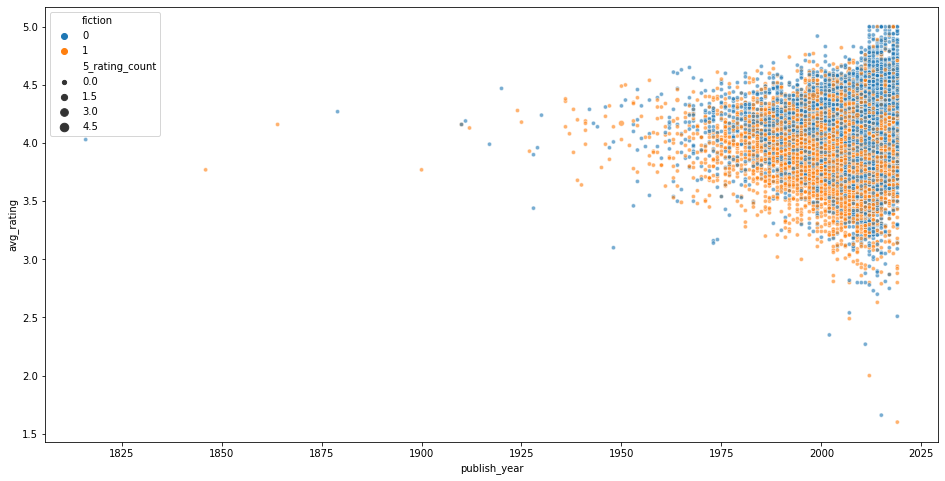

In [54]:
# === Individual scatters === #
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=books2,
    x="publish_year",
    y="avg_rating",
    size="5_rating_count",
    hue="fiction",
    alpha=0.6,
)

#### Group by target

I'm going to look and see if there are any significant differences in any of the variables when separated / grouped by the target.

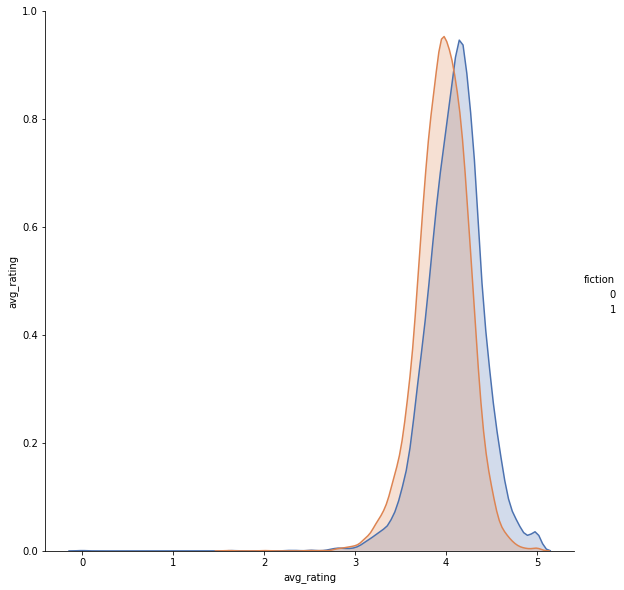

In [104]:
# === Scatter matrix / pairplot === #
sns.pairplot(
    books2,
    hue="fiction",
    vars=["avg_rating"],
    palette="deep",
    plot_kws=dict(alpha=0.8, s=20),
    height=8,
);

I'd like to do the same as above for 'num_ratings'. However, the outliers will make it difficult to see anything. For the purposes of this particular visualization, I'm going to remove those outliers.

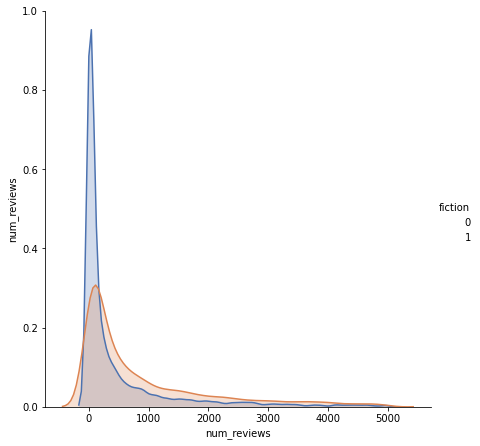

In [107]:
# === Scatter matrix / pairplot === #
# This time, with num_ratings outliers removed
sns.pairplot(
    books2[books2["num_reviews"] < 5000],
    hue="fiction",
    vars=["num_reviews"],
    palette="deep",
    plot_kws=dict(alpha=0.8, s=20),
    height=6,
);

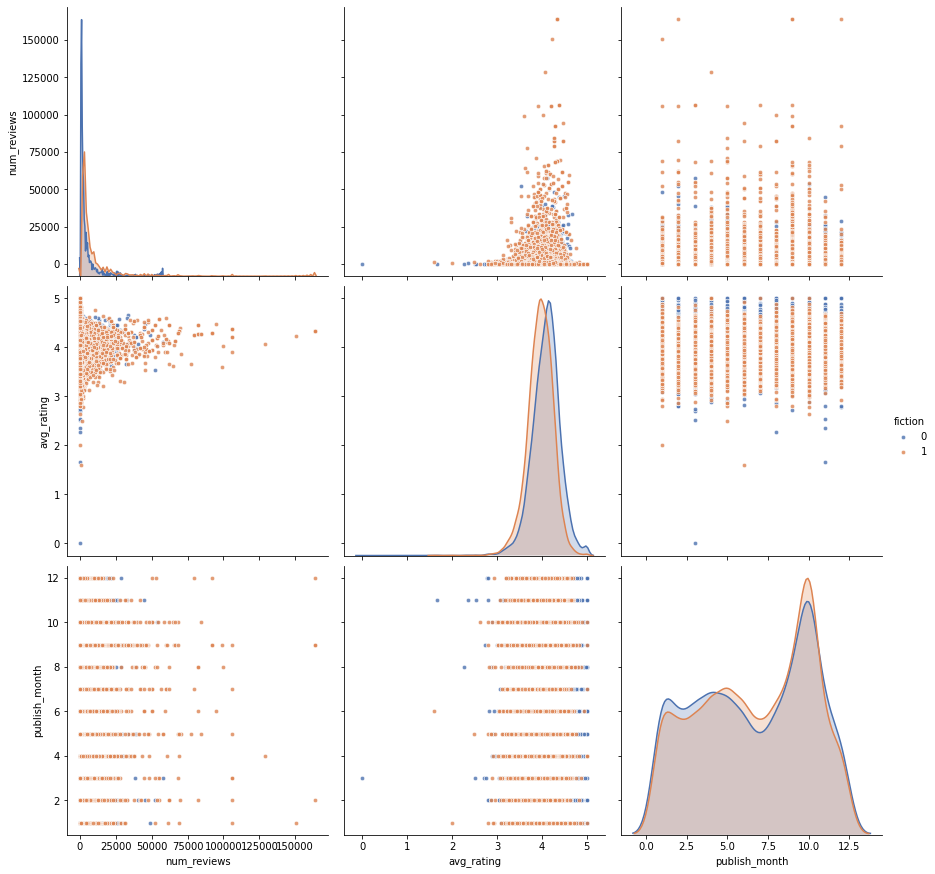

In [109]:
# === Scatter matrix / pairplot === #
sns.pairplot(
    books2,
    hue="fiction",
    vars=["num_reviews", "avg_rating", "publish_month"],
    palette="deep",
    plot_kws=dict(alpha=0.8, s=20),
    height=4,
);